# Modelos a nivel departamental SEMANAL

In [150]:
import machine_learning_tool
from machine_learning_tool import MLPipelineSD
from importlib import reload
import pandas as pd
reload(machine_learning_tool)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, roc_auc_score

In [151]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, description="departamental models")

In [152]:
df=model.get_pure_dataset(MLPipelineSD.weekly)

In [153]:
df.columns

Index(['cod_munici', 'año', 'Semana/Mes', 'periodo', 'Codigo DANE-periodo',
       'region', 'subregion', 'departamento', 'municipio', 'casos_',
       'total_poblacion', 'areakm2', 'antropica', 'bosques',
       'cultivos.permanentes', 'cultivos.transitorios', 'herbazales',
       'mosaico', 'pastos', 'vegetacion.secundaria', 'zonas.acuaticas',
       'otras.coberturas', 'arido', 'seco', 'humedo', 'pluvial', 'msnm',
       'minmsnm', 'maxmsnm', 'rango.msnm', 'deforestacion05.16',
       'cuerpos.de.agua', 'zos.inundables', 'zos.susceptibles.de.inundacion',
       'temperatura', 'min.temperatura', 'max.temperatura', 'precipitacion',
       'min.precipitacion', 'max.precipitacion',
       'Cobertura neta en educación secundaria',
       'Puntaje promedio Pruebas Saber 11 - Lectura crítica',
       'Tasa de mortalidad infantil en menores de 5 años ',
       'Cobertura vacunación pentavalente en menores de 1 año',
       'Cobertura de acueducto (REC)', 'Densidad poblacional',
       'Ingr

In [154]:
df_only_departamentos=df["departamento"]

In [155]:
df_only_departamentos_drop=df_only_departamentos.drop_duplicates()

In [156]:
df_only_departamentos_drop.values

array(['ANTIOQUIA', 'ATLANTICO', 'CUNDIMARCA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CAUCA', 'CESAR', 'CORDOBA', 'CHOCO', 'HUILA',
       'GUAJIRA', 'MAGDALE', 'META', 'NARIÑO', 'NORTE SANTANDER',
       'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'ARAUCA', 'CASARE', 'PUTUMAYO', 'GUAVIARE', 'VICHADA'],
      dtype=object)

In [157]:
departamentos_list=['ANTIOQUIA', 'ATLANTICO', 'CUNDIMARCA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CAUCA', 'CESAR', 'CORDOBA', 'CHOCO', 'HUILA',
       'GUAJIRA', 'MAGDALE', 'META', 'NARIÑO', 'NORTE SANTANDER',
       'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'ARAUCA', 'CASARE', 'PUTUMAYO', 'GUAVIARE', 'VICHADA']

In [158]:
variables_mean=['antropica', 'bosques', 'cultivos.permanentes',
       'cultivos.transitorios', 'herbazales', 'mosaico', 'pastos',
       'vegetacion.secundaria', 'zonas.acuaticas', 'otras.coberturas', 'arido',
       'seco', 'humedo', 'pluvial', 'msnm', 'minmsnm', 'maxmsnm', 'rango.msnm',
       'deforestacion05.16', 'cuerpos.de.agua', 'zos.inundables',
       'zos.susceptibles.de.inundacion', 'temperatura', 'min.temperatura',
       'max.temperatura', 'precipitacion', 'min.precipitacion',
       'max.precipitacion', 'Cobertura neta en educación secundaria',
       'Puntaje promedio Pruebas Saber 11 - Lectura crítica',
       'Tasa de mortalidad infantil en menores de 5 años ',
       'Cobertura vacunación pentavalente en menores de 1 año',
       'Cobertura de acueducto (REC)', 'Densidad poblacional',
       'Ingresos totales per cápita',
       'Tasa de homicidios (x cada 100.000 habitantes)',
'Tasa de hurtos (x cada 100.000 habitantes)',
'Disparidades_Económicas',
'DIMENSION URBANA ',
       'DIMENSIÓN ECONOMICA', 'DIMENSIÓN CALIDAD DE VIDA',
       'DIMENSIÓN SEGURIDAD', 'Temperatura', 'Precipitación', 'EVI',
'promedio_poblacion']

In [159]:
variables_sum=['Número de personas secuestradas',
       'Número de personas desplazadas', 'Crecimiento_Pob',
'Hectareas_Coca',
'casos_',
       'total_poblacion', 'areakm2']

In [160]:
df_dates= pd.DataFrame()

In [161]:
df_dates["año"]=df["año"]
df_dates["Semana/Mes"]=df["Semana/Mes"]
df_dates["periodo"]=df["periodo"]

In [162]:
df_dates_final=df_dates.groupby("periodo").first().reset_index()

In [163]:
df_final= pd.DataFrame()
df_departamental_complete=pd.DataFrame()

In [164]:
for i in range(len(departamentos_list)):
    dept= pd.DataFrame()
    dept_final=pd.DataFrame()
    dept=df["departamento"]==departamentos_list[i]
    dept=df[dept]
           
    for variable_sum in variables_sum:
        dept_final[variable_sum]=dept.groupby(by="periodo").sum()[variable_sum].values
    for variable_mean in variables_mean:
        dept_final[variable_mean]=dept.groupby(by="periodo").mean()[variable_mean].values
    
    dept_final["departamento"]=departamentos_list[i]
    
    df_final=pd.concat([df_dates_final, dept_final], axis=1)
    df_departamental_complete=pd.concat([df_departamental_complete, df_final], )
    

In [165]:
#df.groupby(['periodo','departamento']).sum()

In [166]:
df_departamental_complete.shape

(14616, 57)

In [167]:
#Calculo de la incidencia por cada 100.000 habitantes
total = df_departamental_complete
total_popu=df_departamental_complete["total_poblacion"]
weekly_incidence = (total["casos_"]*100000/total_popu)

weekly_incidence.rename('incidencia_', inplace = True)
df_departamental_complete = pd.concat([total, weekly_incidence], axis=1)


In [168]:
df_departamental_complete

,periodo,año,Semana/Mes,Número de personas secuestradas,Número de personas desplazadas,Crecimiento_Pob,Hectareas_Coca,casos_,total_poblacion,areakm2,...,DIMENSION URBANA,DIMENSIÓN ECONOMICA,DIMENSIÓN CALIDAD DE VIDA,DIMENSIÓN SEGURIDAD,Temperatura,Precipitación,EVI,promedio_poblacion,departamento,incidencia_
0,1,2007,1,655.0,350219.0,2.680018,2725.0,2,5835008,63194.817293,...,0.098059,0.505536,0.541605,0.745504,20.522872,30.701490,4322.300298,49466.825854,ANTIOQUIA,0.034276
1,2,2007,2,655.0,350219.0,2.680018,2725.0,0,5835008,63194.817293,...,0.098059,0.505536,0.541605,0.745504,20.408476,71.852499,4339.141908,49466.825854,ANTIOQUIA,0.000000
2,3,2007,3,655.0,350219.0,2.680018,2725.0,0,5835008,63194.817293,...,0.098059,0.505536,0.541605,0.745504,20.602056,43.309784,4259.038617,49466.825854,ANTIOQUIA,0.000000
3,4,2007,4,655.0,350219.0,2.680018,2725.0,0,5835008,63194.817293,...,0.098059,0.505536,0.541605,0.745504,20.915127,90.779382,4110.160310,49466.825854,ANTIOQUIA,0.000000
4,5,2007,5,655.0,350219.0,2.680018,2725.0,2,5835008,63194.817293,...,0.098059,0.505536,0.541605,0.745504,21.154200,15.511126,4164.689312,49466.825854,ANTIOQUIA,0.034276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,2016,48,23.0,12437.0,0.403003,1242.0,0,73702,100085.488116,...,0.130621,0.347421,0.322762,0.622042,26.357072,28.920200,3571.367262,16544.977969,VICHADA,0.000000
518,519,2016,49,23.0,12437.0,0.403003,1242.0,0,73702,100085.488116,...,0.130621,0.347421,0.322762,0.622042,25.889285,14.484025,3417.740732,16544.977969,VICHADA,0.000000
519,520,2016,50,23.0,12437.0,0.403003,1242.0,0,73702,100085.488116,...,0.130621,0.347421,0.322762,0.622042,25.776682,14.266376,3256.997728,16544.977969,VICHADA,0.000000
520,521,2016,51,23.0,12437.0,0.403003,1242.0,0,73702,100085.488116,...,0.130621,0.347421,0.322762,0.622042,25.522817,8.457850,3387.542971,16544.977969,VICHADA,0.000000


In [169]:
df_departamental_complete.to_csv('df_semanal_departamental.csv')

## Modelo de regresion_

### incidencia_

In [172]:
df_departamental_complete["casos_"].mean()

6.183771209633279

In [170]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

[08:30:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 3.2840993579847773
mean_squared_error 45.10675823875761
r2_score 0.6751074291189558
explained_variance_score 0.6751075277896109


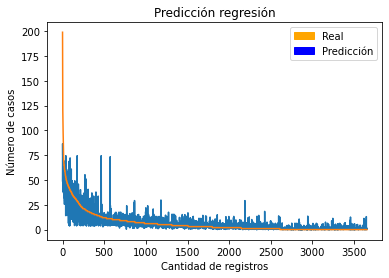

In [171]:
model.run(classification=False, test_size=0.25, feature_scaling_function=model.standardization, model_function=model.XGBRegressor, hyperparameters={}, random_sate=None , show_metrics=True, inv_feature_scaling=True, no_zeros_ds=False)

### casos_

In [24]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:53:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 3.2840993579847773
mean_squared_error 45.10675823875761
r2_score 0.6751074291189558
explained_variance_score 0.6751075277896109


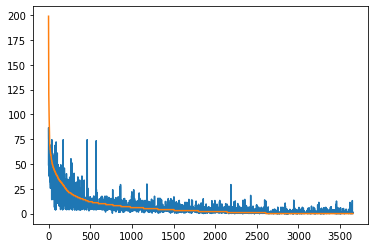

In [25]:
model.run(classification=False, test_size=0.25, feature_scaling_function=model.standardization, model_function=model.XGBRegressor, hyperparameters={}, random_sate=None , show_metrics=True, inv_feature_scaling=True, no_zeros_ds=False)

## Modelo de clasificación

### XGBoost (INCIDENCIA) 2 clases

In [26]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='incidencia_', description="No description", delete_columns_white_sapaces=False)

In [27]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.XGBClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed


 Training and test predicting phase finished 

confusion_matrix [[2549  467]
 [  67  571]]
accuracy 0.8538587848932676
precision_0 0.974388379204893
recall_0 0.8451591511936339
f1_score_0 0.9051846590909091
precision_1 0.5500963391136802
recall_1 0.8949843260188087
f1_score_1 0.6813842482100239
precision_macro 0.7622423591592866
recall_macro 0.8700717386062213
f1_macro 0.7932844536504664
classification_report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3016
           1       0.55      0.89      0.68       638

    accuracy                           0.85      3654
   macro avg       0.76      0.87      0.79      3654
weighted avg       0.90      0.85      0.87      3654



### XGBoost (CASOS) 2 clases

In [28]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

In [29]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.XGBClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 Training and test predicting phase finished 

confusion_matrix [[ 877  169]
 [ 373 2235]]
accuracy 0.8516694033935414
precision_0 0.7016
recall_0 0.8384321223709369
f1_score_0 0.763937282229965
precision_1 0.9297004991680532
recall_1 0.8569785276073619
f1_score_1 0.8918595371109337
precision_macro 0.8156502495840265
recall_macro 0.8477053249891494
f1_macro 0.8278984096704494
classification_report
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1046
           1       0.93      0.86      0.89      2608

    accuracy                           0.85      3654
   macro avg       0.82      0.85      0.83      3654
weighted avg       0.86      0.85      0.86      3654



### MLP (INCIDENCIA) 2 clases

In [30]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='incidencia_', description="No description", delete_columns_white_sapaces=False)

In [31]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.kerasMLPClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
W0502 09:54:11.927908  6068 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0502 09:54:11.929908  6068 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0502 09:5

Epoch 1/150
17786/17786 [==============================] - 1s 55us/step - loss: 0.3668 - acc: 0.8532
Epoch 2/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.3062 - acc: 0.8758
Epoch 3/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.3005 - acc: 0.8764
Epoch 4/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2984 - acc: 0.8765
Epoch 5/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2966 - acc: 0.8768
Epoch 6/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2948 - acc: 0.8775
Epoch 7/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2945 - acc: 0.8757
Epoch 8/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2943 - acc: 0.8772
Epoch 9/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2924 - acc: 0.8768
Epoch 10/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2908 - a

17786/17786 [==============================] - 0s 26us/step - loss: 0.2633 - acc: 0.8899
Epoch 82/150
17786/17786 [==============================] - 0s 26us/step - loss: 0.2636 - acc: 0.8909
Epoch 83/150
17786/17786 [==============================] - 0s 25us/step - loss: 0.2634 - acc: 0.8914
Epoch 84/150
17786/17786 [==============================] - 1s 30us/step - loss: 0.2636 - acc: 0.8922
Epoch 85/150
17786/17786 [==============================] - 0s 27us/step - loss: 0.2623 - acc: 0.8917
Epoch 86/150
17786/17786 [==============================] - 1s 28us/step - loss: 0.2626 - acc: 0.8926
Epoch 87/150
17786/17786 [==============================] - 1s 32us/step - loss: 0.2625 - acc: 0.8915
Epoch 88/150
17786/17786 [==============================] - 1s 33us/step - loss: 0.2608 - acc: 0.8922
Epoch 89/150
17786/17786 [==============================] - 0s 27us/step - loss: 0.2627 - acc: 0.8900
Epoch 90/150
17786/17786 [==============================] - 0s 27us/step - loss: 0.2624 - acc: 

### MLP (CASOS_) 2 clases

In [32]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

In [33]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.kerasMLPClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Documents\Unal\Maestria_2018_2\Tesis\MLPipeline\machine_learning_tool.py:649: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=53, units=128, kernel_initializer="uniform")`
  classifier.add(Dense(output_dim=128, init='uniform', activation='relu', input_dim=len(self.X_train.columns)))
C:\Users\Daniel\Documents\Unal\Maestria_2018_2\Tesis\MLPipeline\machine_learning_tool.py:651: UserWarning: Update your `Dropout` call to the K

Epoch 1/150
14982/14982 [==============================] - 1s 63us/step - loss: 0.4347 - acc: 0.8275
Epoch 2/150
14982/14982 [==============================] - 0s 28us/step - loss: 0.3565 - acc: 0.8600
Epoch 3/150
14982/14982 [==============================] - 0s 31us/step - loss: 0.3528 - acc: 0.8613
Epoch 4/150
14982/14982 [==============================] - 0s 30us/step - loss: 0.3509 - acc: 0.8627
Epoch 5/150
14982/14982 [==============================] - 0s 28us/step - loss: 0.3503 - acc: 0.8633
Epoch 6/150
14982/14982 [==============================] - 0s 28us/step - loss: 0.3500 - acc: 0.8618
Epoch 7/150
14982/14982 [==============================] - 0s 28us/step - loss: 0.3489 - acc: 0.8619
Epoch 8/150
14982/14982 [==============================] - 0s 29us/step - loss: 0.3481 - acc: 0.8627
Epoch 9/150
14982/14982 [==============================] - 0s 29us/step - loss: 0.3468 - acc: 0.8620
Epoch 10/150
14982/14982 [==============================] - 0s 29us/step - loss: 0.3474 - a

## Porcentaje de casos ceros

In [34]:
mayor0=df_departamental_complete.query('casos_ > 0').count()["casos_"]

In [35]:
cero0=df_departamental_complete.query('casos_ <= 0').count()["casos_"]

In [36]:
total=mayor0+cero0

In [37]:
cero0*1/total

0.28639846743295017

## Distribución de los datos

In [38]:
model.dataset["casos_"].value_counts()

0      4186
1      1970
2      1305
3      1099
4       864
5       715
6       641
7       510
8       416
9       326
10      316
11      227
12      210
13      137
16      133
14      131
15      118
17       95
18       87
19       68
21       67
20       63
22       53
23       46
28       44
25       44
31       43
26       42
24       37
38       33
       ... 
108       1
119       1
79        1
190       1
110       1
102       1
78        1
245       1
165       1
141       1
133       1
109       1
101       1
116       1
92        1
74        1
84        1
151       1
107       1
91        1
75        1
178       1
154       1
138       1
130       1
114       1
106       1
98        1
90        1
171       1
Name: casos_, Length: 129, dtype: int64

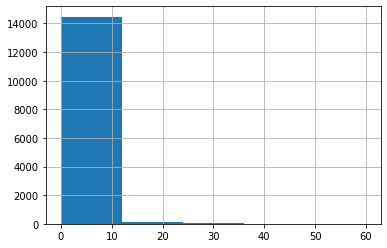

In [39]:
hist1 = df_departamental_complete["incidencia_"].hist(bins=5)

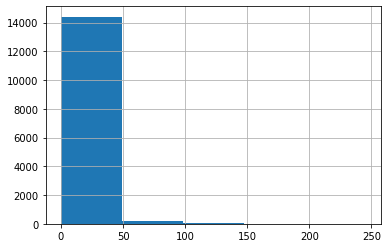

In [40]:
hist2 = df_departamental_complete["casos_"].hist(bins=5)

## Clasificacion con más de 2 clases

In [41]:
model = MLPipelineSD(dataset_type=MLPipelineSD.weekly, description="3 clases")

KeyboardInterrupt: 

In [ ]:
model.run(feature_scaling_function=model.standardization, model_function=model.XGBClassifier, sampling={'method':model.imSMOTETomekOversamplingUndersampling, "shuffle": True},
         class_ranges=[0,3,5], show_metrics=True)